1. if debug_flag==True: print('log')

2. Write sanity checks
-   type of data
-   shape of data
-   few instance of the data

3. Visualize the image


In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
training_data = datasets.FashionMNIST(
    root=r"C:\Users\muthu\Documents\TSAI\data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [3]:
len(training_data)

60000

In [4]:
img,label = training_data[100]

In [5]:
print(label), type(label)

8


(None, int)

In [6]:
print(img), type(img), img.shape

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0000, 0.0000, 0.0706, 0.4196, 0.4667, 0.4039,
          0.0353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.3882, 0.6078, 0.4431, 0.2392, 0.4627,
          0.6784, 0.4588, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.4314, 0.5333, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.6549, 0.6235, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0235,
          0.0000, 0.2824, 0.5765, 0.0000, 0.0000, 0.0196, 0.0000, 0.0078,
          0.0000, 0.0000, 0.6824, 0.4627, 0.0000, 0.0196,

(None, torch.Tensor, torch.Size([1, 28, 28]))

In [7]:
img.squeeze().shape

torch.Size([28, 28])

In [8]:
import matplotlib.pyplot as plt

label_map = {}
for i,j in training_data.class_to_idx.items():
    label_map[j]=i

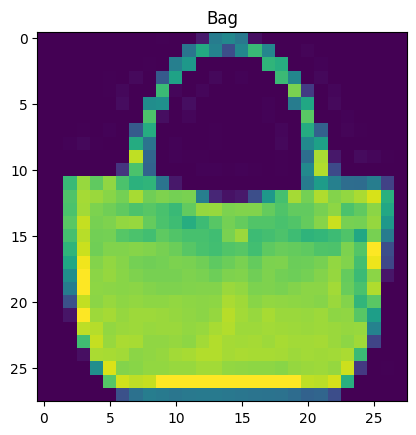

In [9]:
plt.title(label_map[label])
plt.imshow(img.squeeze())

In [10]:
import torchaudio
import torchaudio.transforms  as tfs
import IPython.display as idp

In [11]:
idp.Audio(r'C:\Users\muthu\Documents\TSAI\data\torchaudio wav\Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav')

In [12]:
str(torchaudio.get_audio_backend())

'soundfile'

In [13]:
audio, sample_rate = torchaudio.load(r'C:\Users\muthu\Documents\TSAI\data\torchaudio wav\Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav')

print(audio)
type(audio)

tensor([[0.0183, 0.0180, 0.0180,  ..., 0.0018, 0.0019, 0.0032]])


torch.Tensor

In [14]:
audio.shape

torch.Size([1, 54400])

In [15]:
sample_rate

16000

In [16]:
mfcc_transform = tfs.MFCC(n_mfcc=15,sample_rate=sample_rate)
mfcc_feat = mfcc_transform(audio)

type(mfcc_transform), type(mfcc_feat), mfcc_feat.shape

c:\Users\muthu\miniconda3\envs\torchenv\Lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


(torchaudio.transforms._transforms.MFCC,
 torch.Tensor,
 torch.Size([1, 15, 273]))

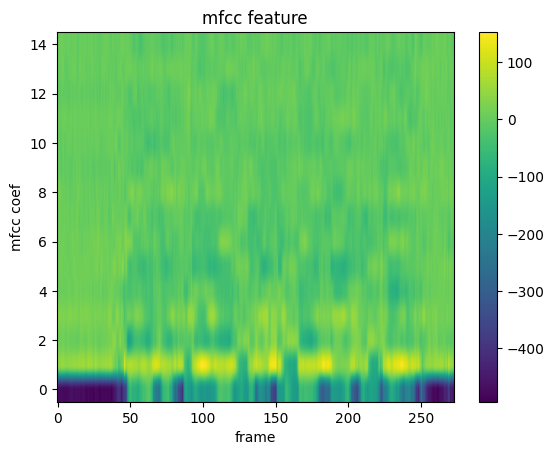

In [17]:
plt.title('mfcc feature')
plt.ylabel('mfcc coef')
plt.xlabel('frame')

plt.imshow(mfcc_feat.squeeze(),origin='lower',aspect='auto')
plt.colorbar()
plt.show()